In [1]:
%pylab --no-import-all notebook
import warnings
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way1 + "new_list.npy").tolist()

<IPython.core.display.Javascript object>


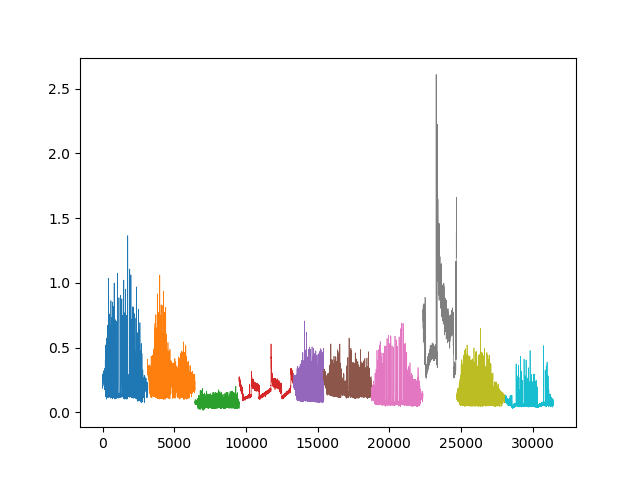

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist]
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


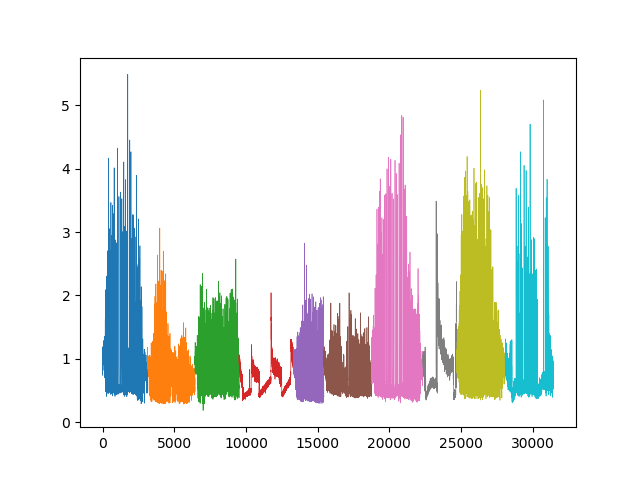

In [4]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist]
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [5]:
train_data = []

for data in trlist:
    train_data.append(np.load(way1 + data))


In [6]:
valid_tab = []
for i in range(1,11):
    valid_tab.append(pd.read_csv(valid_path + "Real_data_HMM_" + str(i) + "_Obecne.csv"))

In [7]:
Sorted_tab = []
for val in valid_tab:
    Sorted_tab.append(val.sort_values(['Accuracy'], ascending=False))

In [8]:
Sorted_tab[0].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
1077,"(0, 1, 0, 0, 1)","(0, 0, 0, 16)",0.808859,643,0.908503,0.641044,0.753846,0.767798,0.952498,0.476807,0.900735,0.868391,0.977876,0.648148
2143,"(1, 0, 0, 0, 1)","(0, 0, 0, 16)",0.808264,645,0.899822,0.640474,0.767082,0.769126,0.951128,0.481605,0.882893,0.853768,0.955752,0.678131
2458,"(1, 0, 0, 1, 1)","(0, 10, 16, 16)",0.806778,650,0.873895,0.668712,0.783251,0.775286,0.917698,0.511737,0.887277,0.834083,0.964602,0.701058
11,"(0, 0, 0, 0, 1)","(0, 0, 0, 16)",0.804994,656,0.902640,0.654247,0.728932,0.761940,0.911175,0.493258,0.931413,0.894263,0.971239,0.598765
2470,"(1, 0, 0, 1, 1)","(0, 0, 12, 16)",0.803508,661,0.905238,0.629603,0.749614,0.761485,0.949383,0.467310,0.898890,0.865017,0.964602,0.642857
2422,"(1, 0, 0, 1, 1)","(0, 8, 16, 16)",0.803210,662,0.871101,0.671851,0.772994,0.771982,0.913580,0.517986,0.868132,0.832396,0.955752,0.696649
2809,"(1, 0, 1, 0, 1)","(0, 10, 16, 16)",0.803210,662,0.869849,0.667180,0.779776,0.772268,0.919749,0.511820,0.868906,0.825084,0.957965,0.707231
2278,"(1, 0, 0, 1, 1)","(4, 0, 16, 16)",0.802616,664,0.869183,0.671851,0.773333,0.771456,0.906040,0.517986,0.878788,0.835208,0.955752,0.690476
2773,"(1, 0, 1, 0, 1)","(0, 8, 16, 16)",0.801427,668,0.873256,0.658537,0.774792,0.768862,0.924576,0.502326,0.868565,0.827334,0.955752,0.699295
1392,"(0, 1, 0, 1, 1)","(0, 10, 16, 16)",0.801427,668,0.879717,0.653123,0.767314,0.766718,0.924411,0.494869,0.882016,0.839145,0.960177,0.679012


In [9]:
Sorted_tab[1].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.841748,536,0.867647,0.841339,0.815672,0.841553,0.936508,0.881098,0.743032,0.808219,0.805014,0.904053
3272,"(1, 1, 0, 1, 1)","(4, 8, 16, 16)",0.836729,553,0.867269,0.836672,0.805607,0.836516,0.918774,0.936207,0.727031,0.821233,0.756267,0.903226
3308,"(1, 1, 0, 1, 1)","(4, 10, 16, 16)",0.829348,578,0.865248,0.789293,0.815011,0.823184,0.950779,0.778078,0.752274,0.793836,0.800836,0.889165
2593,"(1, 0, 1, 0, 1)","(4, 10, 16, 16)",0.819900,610,0.862613,0.778544,0.798574,0.813244,0.954319,0.865417,0.701754,0.786986,0.707521,0.926385
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.819900,610,0.865085,0.779661,0.794501,0.813082,0.942649,0.927063,0.692260,0.799315,0.672702,0.932175
3416,"(1, 1, 0, 1, 1)","(6, 10, 16, 16)",0.819604,611,0.862199,0.759837,0.810136,0.810724,0.957358,0.740741,0.746341,0.784247,0.779944,0.885856
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.818423,615,0.865123,0.780211,0.790071,0.811802,0.933386,0.933981,0.691496,0.806164,0.669916,0.921423
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.817833,617,0.864765,0.773570,0.792519,0.810285,0.941889,0.917782,0.691077,0.799315,0.668524,0.928867
1248,"(0, 1, 0, 1, 1)","(6, 8, 16, 16)",0.816947,620,0.860674,0.770958,0.796965,0.809533,0.949587,0.833333,0.707505,0.786986,0.717270,0.912324
2242,"(1, 0, 0, 1, 1)","(4, 10, 16, 16)",0.815176,626,0.861352,0.747922,0.805814,0.805030,0.960404,0.743802,0.733379,0.780822,0.752089,0.894127


In [10]:
Sorted_tab[2].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2156,"(1, 0, 0, 1, 0)","(6, 10, 12, 0)",0.979202,49,0.986610,0.985161,0.609756,0.860509,1.000000,0.978433,0.568182,0.973573,0.991983,0.657895
2147,"(1, 0, 0, 1, 0)","(4, 10, 12, 0)",0.979202,49,0.987152,0.985161,0.592593,0.854969,1.000000,0.978433,0.558140,0.974630,0.991983,0.631579
2165,"(1, 0, 0, 1, 0)","(0, 10, 12, 0)",0.978778,50,0.986610,0.984805,0.592593,0.854669,1.000000,0.977730,0.558140,0.973573,0.991983,0.631579
3228,"(1, 1, 0, 1, 0)","(0, 8, 12, 0)",0.977929,52,0.986610,0.984104,0.545455,0.838723,1.000000,0.975645,0.538462,0.973573,0.992711,0.552632
2162,"(1, 0, 0, 1, 0)","(0, 8, 12, 0)",0.977504,53,0.986066,0.983749,0.545455,0.838423,1.000000,0.974946,0.538462,0.972516,0.992711,0.552632
2148,"(1, 0, 0, 1, 0)","(4, 10, 14, 0)",0.977504,53,0.984979,0.983725,0.602410,0.857038,1.000000,0.976310,0.555556,0.970402,0.991254,0.657895
16,"(0, 0, 0, 1, 0)","(4, 10, 14, 0)",0.977504,53,0.985043,0.982304,0.591549,0.852965,0.995680,0.973515,0.636364,0.974630,0.991254,0.552632
2157,"(1, 0, 0, 1, 0)","(6, 10, 14, 0)",0.977504,53,0.984979,0.983725,0.602410,0.857038,1.000000,0.976310,0.555556,0.970402,0.991254,0.657895
34,"(0, 0, 0, 1, 0)","(0, 10, 14, 0)",0.977080,54,0.983957,0.981962,0.600000,0.855307,0.995671,0.972143,0.656250,0.972516,0.991983,0.552632
17,"(0, 0, 0, 1, 0)","(4, 10, 16, 0)",0.976231,56,0.983414,0.981241,0.591549,0.852068,0.995666,0.971429,0.636364,0.971459,0.991254,0.552632


In [11]:
Sorted_tab[3].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2494,"(1, 0, 0, 1, 1)","(0, 0, 16, 16)",0.839544,577,0.864422,0.766932,0.835197,0.822183,0.968504,0.671902,0.772515,0.780539,0.893271,0.908948
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.836207,589,0.877342,0.769448,0.803240,0.816677,0.947272,0.985507,0.704559,0.817028,0.631090,0.934066
2725,"(1, 0, 1, 0, 1)","(6, 0, 14, 16)",0.832314,603,0.859056,0.725338,0.839207,0.807867,0.955930,0.621891,0.788276,0.780011,0.870070,0.897174
3558,"(1, 1, 0, 1, 1)","(0, 0, 16, 14)",0.831758,605,0.866724,0.723735,0.827221,0.805893,0.936732,0.623116,0.797958,0.806452,0.863109,0.858713
3556,"(1, 1, 0, 1, 1)","(0, 0, 16, 12)",0.830645,609,0.871951,0.701923,0.824686,0.799520,0.916133,0.599343,0.825984,0.831835,0.846868,0.823391
3559,"(1, 1, 0, 1, 1)","(0, 0, 16, 15)",0.830367,610,0.862148,0.714697,0.834020,0.803622,0.943432,0.609836,0.797849,0.793760,0.863109,0.873626
3910,"(1, 1, 1, 0, 1)","(0, 0, 16, 15)",0.830089,611,0.861751,0.723197,0.829993,0.804980,0.946237,0.623529,0.787324,0.791116,0.860789,0.877551
3560,"(1, 1, 0, 1, 1)","(0, 0, 16, 16)",0.829255,614,0.857808,0.713060,0.838018,0.802962,0.952842,0.605178,0.792308,0.780011,0.867749,0.889325
3911,"(1, 1, 1, 0, 1)","(0, 0, 16, 16)",0.829255,614,0.857892,0.712381,0.838257,0.802843,0.954634,0.604200,0.791492,0.778953,0.867749,0.890895
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.828977,615,0.877042,0.718421,0.800544,0.798669,0.957447,0.829787,0.705812,0.809096,0.633411,0.924647


In [12]:
Sorted_tab[4].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.641521,1188,0.600794,0.485846,0.744426,0.610356,0.700231,0.357558,0.812412,0.526087,0.757700,0.686941
2593,"(1, 0, 1, 0, 1)","(4, 10, 16, 16)",0.641219,1189,0.597060,0.482270,0.748711,0.609347,0.715674,0.351504,0.814296,0.512174,0.767967,0.692904
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.638805,1197,0.599097,0.479317,0.742288,0.606901,0.708185,0.352317,0.804878,0.519130,0.749487,0.688730
2701,"(1, 0, 1, 0, 1)","(6, 10, 16, 16)",0.638805,1197,0.595831,0.474903,0.747988,0.606241,0.717258,0.345829,0.812587,0.509565,0.757700,0.692904
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.638805,1197,0.600200,0.478599,0.743689,0.607496,0.708038,0.349763,0.813163,0.520870,0.757700,0.685152
3272,"(1, 1, 0, 1, 1)","(4, 8, 16, 16)",0.635486,1208,0.601326,0.493594,0.728652,0.607857,0.660083,0.367470,0.814897,0.552174,0.751540,0.658915
2242,"(1, 0, 0, 1, 1)","(4, 10, 16, 16)",0.633675,1214,0.600700,0.470663,0.738804,0.603389,0.706228,0.341351,0.817656,0.522609,0.757700,0.673822
2665,"(1, 0, 1, 0, 1)","(6, 8, 16, 16)",0.630054,1226,0.594814,0.459477,0.738849,0.597714,0.716034,0.333333,0.806634,0.508696,0.739220,0.681574
2350,"(1, 0, 0, 1, 1)","(6, 10, 16, 16)",0.628244,1232,0.596758,0.463659,0.734467,0.598295,0.714806,0.333634,0.813179,0.512174,0.759754,0.669648
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.626132,1239,0.602421,0.475273,0.720559,0.599418,0.679781,0.345794,0.814898,0.540870,0.759754,0.645796


In [13]:
Sorted_tab[5].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3272,"(1, 1, 0, 1, 1)","(4, 8, 16, 16)",0.862004,292,0.877336,0.847761,0.852973,0.859357,0.950633,0.937294,0.771261,0.814534,0.773842,0.954051
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.858223,300,0.871614,0.847761,0.849785,0.856387,0.953608,0.937294,0.763742,0.802603,0.773842,0.957678
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.850189,317,0.859197,0.841481,0.845339,0.848673,0.959839,0.922078,0.752121,0.777657,0.773842,0.964933
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.849244,319,0.862932,0.836858,0.841438,0.847076,0.957672,0.938983,0.747418,0.785249,0.754768,0.962515
3308,"(1, 1, 0, 1, 1)","(4, 10, 16, 16)",0.849244,319,0.862069,0.840361,0.840933,0.847788,0.953947,0.939394,0.748820,0.786334,0.760218,0.958888
2665,"(1, 0, 1, 0, 1)","(6, 8, 16, 16)",0.847826,322,0.855072,0.849028,0.841112,0.848404,0.964578,0.940397,0.742593,0.767896,0.773842,0.969770
2242,"(1, 0, 0, 1, 1)","(4, 10, 16, 16)",0.847353,323,0.857831,0.840361,0.840671,0.846288,0.964770,0.939394,0.741906,0.772234,0.760218,0.969770
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.845463,327,0.855763,0.831091,0.841553,0.842803,0.964626,0.920530,0.743281,0.768980,0.757493,0.969770
3416,"(1, 1, 0, 1, 1)","(6, 10, 16, 16)",0.844991,328,0.857314,0.816984,0.844232,0.839510,0.958445,0.882911,0.753321,0.775488,0.760218,0.960097
2593,"(1, 0, 1, 0, 1)","(4, 10, 16, 16)",0.842628,333,0.850030,0.837070,0.838205,0.841768,0.965517,0.927152,0.737374,0.759219,0.762943,0.970979


In [14]:
Sorted_tab[6].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
1455,"(0, 1, 1, 0, 0)","(0, 0, 16, 0)",0.947632,199,0.963054,0.963311,0.075188,0.667184,0.950875,0.970432,0.094340,0.975549,0.956294,0.0625
1454,"(0, 1, 1, 0, 0)","(0, 0, 14, 0)",0.946053,205,0.963565,0.961550,0.000000,0.641705,0.950923,0.968658,0.000000,0.976547,0.954545,0.0000
1102,"(0, 1, 0, 1, 0)","(0, 0, 12, 0)",0.945789,206,0.963820,0.961222,0.000000,0.641681,0.950947,0.969194,0.000000,0.977046,0.953380,0.0000
1453,"(0, 1, 1, 0, 0)","(0, 0, 12, 0)",0.945789,206,0.963565,0.961222,0.014925,0.646571,0.950923,0.969194,0.018519,0.976547,0.953380,0.0125
1104,"(0, 1, 0, 1, 0)","(0, 0, 16, 0)",0.945526,207,0.963565,0.961222,0.000000,0.641596,0.950923,0.969194,0.000000,0.976547,0.953380,0.0000
1103,"(0, 1, 0, 1, 0)","(0, 0, 14, 0)",0.945526,207,0.963565,0.960940,0.000000,0.641502,0.950923,0.968620,0.000000,0.976547,0.953380,0.0000
3230,"(1, 1, 0, 1, 0)","(0, 8, 16, 0)",0.944211,212,0.956522,0.955437,0.000000,0.637319,0.926966,0.974545,0.000000,0.988024,0.937063,0.0000
3216,"(1, 1, 0, 1, 0)","(4, 0, 12, 0)",0.943421,215,0.957198,0.953420,0.000000,0.636873,0.933586,0.964797,0.000000,0.982036,0.942308,0.0000
3227,"(1, 1, 0, 1, 0)","(6, 0, 16, 0)",0.942895,217,0.954325,0.955162,0.000000,0.636496,0.929924,0.967145,0.000000,0.980040,0.943473,0.0000
2665,"(1, 0, 1, 0, 1)","(6, 8, 16, 16)",0.942632,218,0.957774,0.951542,0.000000,0.636439,0.937410,0.959147,0.000000,0.979042,0.944056,0.0000


In [15]:
Sorted_tab[7].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.753826,756,0.705882,0.634434,0.812763,0.717693,0.755700,0.631455,0.783063,0.662226,0.637441,0.844806
2920,"(1, 0, 1, 1, 1)","(4, 10, 12, 16)",0.752849,759,0.727445,0.545939,0.816438,0.696607,0.726066,0.623100,0.794902,0.728830,0.485782,0.839174
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.752524,760,0.723164,0.523169,0.816960,0.687764,0.715750,0.708502,0.781268,0.730733,0.414692,0.856070
4094,"(1, 1, 1, 1, 1)","(6, 10, 12, 16)",0.751221,764,0.722880,0.567244,0.811585,0.700570,0.719811,0.647416,0.791320,0.725975,0.504739,0.832916
3452,"(1, 1, 0, 1, 1)","(6, 0, 16, 16)",0.750244,767,0.700565,0.623407,0.812125,0.712032,0.761161,0.609977,0.780277,0.648906,0.637441,0.846683
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.749267,770,0.699323,0.599045,0.814771,0.704380,0.773041,0.603365,0.771684,0.638440,0.594787,0.862954
3344,"(1, 1, 0, 1, 1)","(4, 0, 16, 16)",0.749267,770,0.702213,0.621287,0.808129,0.710543,0.744931,0.650259,0.773455,0.664129,0.594787,0.846058
2992,"(1, 0, 1, 1, 1)","(6, 8, 12, 16)",0.748290,773,0.721776,0.521739,0.816054,0.686523,0.716698,0.611465,0.793613,0.726927,0.454976,0.839800
3731,"(1, 1, 1, 0, 1)","(6, 8, 16, 16)",0.748290,773,0.698035,0.611364,0.813702,0.707700,0.764439,0.587336,0.782659,0.642245,0.637441,0.847309
3623,"(1, 1, 1, 0, 1)","(4, 8, 16, 16)",0.747965,774,0.692308,0.623104,0.812594,0.709335,0.750834,0.613793,0.780081,0.642245,0.632701,0.847935


In [16]:
Sorted_tab[8].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.721148,923,0.374486,0.808940,0.753653,0.645693,0.585209,0.790698,0.685443,0.275340,0.828044,0.836940
2665,"(1, 0, 1, 0, 1)","(6, 8, 16, 16)",0.714199,946,0.371700,0.796875,0.748409,0.638995,0.615385,0.803451,0.660556,0.266263,0.790406,0.863215
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.713293,949,0.369135,0.798357,0.747570,0.638354,0.593960,0.808012,0.660154,0.267776,0.788930,0.861669
1140,"(0, 1, 0, 1, 1)","(4, 8, 16, 16)",0.709366,962,0.355879,0.798436,0.740689,0.631668,0.570000,0.770233,0.679124,0.258699,0.828782,0.814529
3272,"(1, 1, 0, 1, 1)","(4, 8, 16, 16)",0.707553,968,0.355513,0.785812,0.761002,0.634109,0.478261,0.730501,0.747392,0.282905,0.850185,0.775116
1248,"(0, 1, 0, 1, 1)","(6, 8, 16, 16)",0.707251,969,0.348195,0.796610,0.737175,0.627327,0.583630,0.763710,0.675902,0.248109,0.832472,0.810665
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.705740,974,0.359233,0.786791,0.747098,0.631041,0.539394,0.765898,0.685604,0.269289,0.808856,0.820711
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.701813,987,0.350674,0.776049,0.757045,0.627923,0.482759,0.716427,0.746246,0.275340,0.846494,0.768161
2701,"(1, 0, 1, 0, 1)","(6, 10, 16, 16)",0.698187,999,0.353945,0.779893,0.733639,0.622492,0.599278,0.805665,0.636209,0.251135,0.755720,0.866306
2593,"(1, 0, 1, 0, 1)","(4, 10, 16, 16)",0.696073,1006,0.354565,0.779092,0.730128,0.621261,0.594306,0.806477,0.633012,0.252648,0.753506,0.862442


In [17]:
Sorted_tab[9].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3560,"(1, 1, 0, 1, 1)","(0, 0, 16, 16)",0.862102,433,0.900721,0.870726,0.805530,0.858992,0.909785,0.956044,0.758023,0.891837,0.799387,0.859390
1563,"(0, 1, 1, 0, 1)","(4, 0, 16, 16)",0.860828,437,0.893824,0.866995,0.813761,0.858193,0.912181,0.934513,0.762683,0.876190,0.808576,0.872173
1320,"(0, 1, 0, 1, 1)","(6, 0, 16, 16)",0.860510,438,0.895231,0.859235,0.815427,0.856631,0.916607,0.916667,0.764858,0.874830,0.808576,0.873156
1212,"(0, 1, 0, 1, 1)","(4, 0, 16, 16)",0.860191,439,0.895420,0.874062,0.804640,0.858041,0.899725,0.959707,0.761863,0.891156,0.802450,0.852507
3440,"(1, 1, 0, 1, 1)","(6, 0, 14, 16)",0.859873,440,0.899038,0.871537,0.801102,0.857226,0.907767,0.964684,0.751724,0.890476,0.794793,0.857424
3803,"(1, 1, 1, 0, 1)","(6, 0, 16, 16)",0.859873,440,0.900308,0.863561,0.803150,0.855673,0.906832,0.945355,0.759194,0.893878,0.794793,0.852507
3548,"(1, 1, 0, 1, 1)","(0, 0, 14, 16)",0.859554,441,0.897267,0.863297,0.807516,0.856027,0.912738,0.940433,0.756223,0.882313,0.797856,0.866273
2386,"(1, 0, 0, 1, 1)","(6, 0, 16, 16)",0.859554,441,0.900174,0.856664,0.808318,0.855052,0.920996,0.946296,0.748117,0.880272,0.782542,0.879056
2278,"(1, 0, 0, 1, 1)","(4, 0, 16, 16)",0.859236,442,0.897480,0.858577,0.808958,0.855005,0.911002,0.946494,0.755764,0.884354,0.785605,0.870206
3452,"(1, 1, 0, 1, 1)","(6, 0, 16, 16)",0.858599,444,0.897654,0.871667,0.797569,0.855630,0.897349,0.956124,0.760250,0.897959,0.800919,0.838741


# Cross fold

In [18]:
temp = list(valid_tab[0]["Kombinace rysů"])
temp1 = list(valid_tab[0]["délky úseku"])

In [19]:
tab_prumer = copy(valid_tab[0])
for i in valid_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délky úseku", axis =1)
tab_prumer = tab_prumer/10
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 0, 5)",0.714749,902.4,0.789665,0.681038,0.418257,0.629653,0.711366,0.620315,0.691218,0.897869,0.794898,0.333725
1,"(0, 0, 0, 0, 1)","(0, 0, 0, 6)",0.722980,878.3,0.794151,0.676748,0.446807,0.639235,0.722412,0.615648,0.695661,0.889535,0.791599,0.366542
2,"(0, 0, 0, 0, 1)","(0, 0, 0, 7)",0.734302,842.9,0.798080,0.683693,0.478429,0.653401,0.733617,0.620022,0.705870,0.880836,0.802425,0.403362
3,"(0, 0, 0, 0, 1)","(0, 0, 0, 8)",0.743574,814.1,0.801287,0.685180,0.506539,0.664335,0.744182,0.621506,0.709803,0.872328,0.803033,0.438927
4,"(0, 0, 0, 0, 1)","(0, 0, 0, 9)",0.751430,789.1,0.801420,0.686748,0.533172,0.673780,0.753628,0.622763,0.713340,0.858933,0.805131,0.474888
5,"(0, 0, 0, 0, 1)","(0, 0, 0, 10)",0.756780,772.8,0.801858,0.687038,0.551424,0.680107,0.763017,0.624509,0.710157,0.847447,0.804121,0.504193
6,"(0, 0, 0, 0, 1)","(0, 0, 0, 11)",0.756644,774.5,0.798924,0.675962,0.564869,0.679918,0.770096,0.615539,0.704661,0.832454,0.792410,0.529741
7,"(0, 0, 0, 0, 1)","(0, 0, 0, 12)",0.757736,770.2,0.796002,0.668640,0.579282,0.681308,0.777220,0.610396,0.702680,0.818435,0.784006,0.555521
8,"(0, 0, 0, 0, 1)","(0, 0, 0, 13)",0.757090,772.7,0.792391,0.660407,0.589365,0.680721,0.784188,0.606710,0.692286,0.803857,0.772548,0.578597
9,"(0, 0, 0, 0, 1)","(0, 0, 0, 14)",0.757312,771.4,0.789536,0.660235,0.596757,0.682176,0.794327,0.607928,0.684605,0.788337,0.773533,0.599427


In [20]:
#tab_prumer.to_csv(valid_path + 'Cross_Fold_Modif_HMM_Obecne.csv',index=False)

In [21]:
tab = pd.read_csv(valid_path + 'Cross_Fold_Modif_HMM_Obecne.csv')

In [23]:
Sorted_Cross_Fold = tab.sort_values(['Accuracy'], ascending=False)
Sorted_Cross_Fold.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.811530,606.3,0.793359,0.763951,0.683584,0.746965,0.857688,0.797517,0.639613,0.748688,0.778536,0.770808
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.811345,606.0,0.793093,0.753622,0.686003,0.744239,0.869213,0.764774,0.637123,0.739789,0.781634,0.775997
2665,"(1, 0, 1, 0, 1)","(6, 8, 16, 16)",0.809872,610.6,0.793143,0.746223,0.686384,0.741917,0.876587,0.745384,0.638278,0.735939,0.784475,0.776258
2593,"(1, 0, 1, 0, 1)","(4, 10, 16, 16)",0.809057,612.9,0.790753,0.749372,0.687461,0.742529,0.871077,0.758109,0.639113,0.736416,0.780591,0.779303
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.808471,616.4,0.791116,0.752016,0.683308,0.742147,0.857349,0.767867,0.640664,0.744043,0.778627,0.768727
2701,"(1, 0, 1, 0, 1)","(6, 10, 16, 16)",0.806361,621.8,0.788867,0.741449,0.686837,0.739051,0.872566,0.744956,0.637484,0.732897,0.776300,0.779005
1140,"(0, 1, 0, 1, 1)","(4, 8, 16, 16)",0.805132,625.1,0.788388,0.747671,0.673253,0.736437,0.856536,0.748016,0.640133,0.740996,0.788568,0.745974
3272,"(1, 1, 0, 1, 1)","(4, 8, 16, 16)",0.804610,632.8,0.785821,0.743123,0.688128,0.739024,0.833175,0.738740,0.663769,0.750261,0.790514,0.744322
1248,"(0, 1, 0, 1, 1)","(6, 8, 16, 16)",0.803852,629.0,0.788033,0.742681,0.673307,0.734674,0.861988,0.729105,0.643756,0.738120,0.796044,0.741826
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.803567,636.7,0.786235,0.743033,0.688946,0.739405,0.837830,0.734643,0.664593,0.748367,0.794694,0.746468


In [25]:
Sorted_Cross_Fold = tab.sort_values(['F míra průměrná'], ascending=False)
Sorted_Cross_Fold.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2206,"(1, 0, 0, 1, 1)","(4, 8, 16, 16)",0.811530,606.3,0.793359,0.763951,0.683584,0.746965,0.857688,0.797517,0.639613,0.748688,0.778536,0.770808
2557,"(1, 0, 1, 0, 1)","(4, 8, 16, 16)",0.811345,606.0,0.793093,0.753622,0.686003,0.744239,0.869213,0.764774,0.637123,0.739789,0.781634,0.775997
2593,"(1, 0, 1, 0, 1)","(4, 10, 16, 16)",0.809057,612.9,0.790753,0.749372,0.687461,0.742529,0.871077,0.758109,0.639113,0.736416,0.780591,0.779303
2314,"(1, 0, 0, 1, 1)","(6, 8, 16, 16)",0.808471,616.4,0.791116,0.752016,0.683308,0.742147,0.857349,0.767867,0.640664,0.744043,0.778627,0.768727
2665,"(1, 0, 1, 0, 1)","(6, 8, 16, 16)",0.809872,610.6,0.793143,0.746223,0.686384,0.741917,0.876587,0.745384,0.638278,0.735939,0.784475,0.776258
3380,"(1, 1, 0, 1, 1)","(6, 8, 16, 16)",0.803567,636.7,0.786235,0.743033,0.688946,0.739405,0.837830,0.734643,0.664593,0.748367,0.794694,0.746468
2701,"(1, 0, 1, 0, 1)","(6, 10, 16, 16)",0.806361,621.8,0.788867,0.741449,0.686837,0.739051,0.872566,0.744956,0.637484,0.732897,0.776300,0.779005
3272,"(1, 1, 0, 1, 1)","(4, 8, 16, 16)",0.804610,632.8,0.785821,0.743123,0.688128,0.739024,0.833175,0.738740,0.663769,0.750261,0.790514,0.744322
3308,"(1, 1, 0, 1, 1)","(4, 10, 16, 16)",0.803317,635.5,0.785758,0.742486,0.686725,0.738323,0.834556,0.731460,0.664259,0.750133,0.792842,0.746642
1140,"(0, 1, 0, 1, 1)","(4, 8, 16, 16)",0.805132,625.1,0.788388,0.747671,0.673253,0.736437,0.856536,0.748016,0.640133,0.740996,0.788568,0.745974
